In [150]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [151]:
train=pd.read_csv('train.csv')
len(train)

1460

In [152]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train['type']='train'
test['type']='test'
sample=pd.read_csv('sample_submission.csv')
df=pd.concat([train,test])


In [153]:
print(df.info())

print(df.describe())
df.apply(lambda x: x.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
type                0
Length: 82, dtype: int64

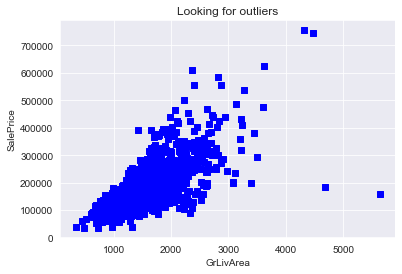

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [154]:


# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(df.GrLivArea, df.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000) & df['type']=='train'].index)


In [155]:
categorical_vars= df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(exclude=['object']).columns
categorical_vars=categorical_vars.drop(['type'])
#train[categorical_vars].describe().T


In [156]:
categorical_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

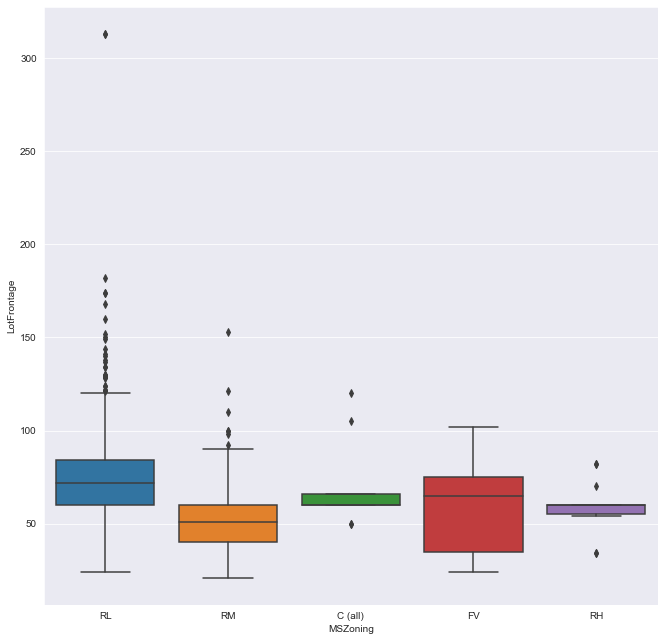

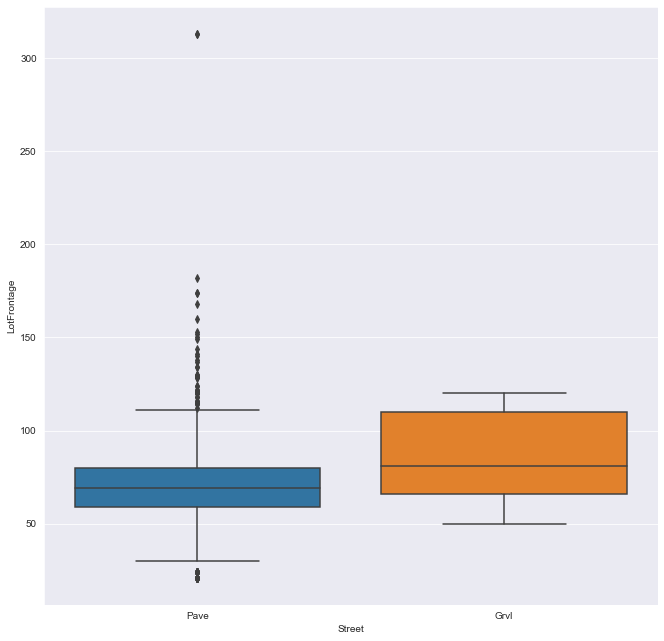

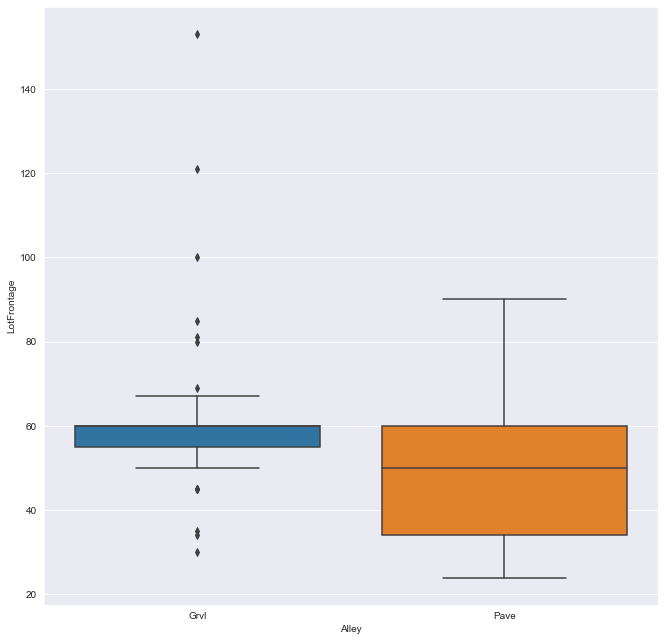

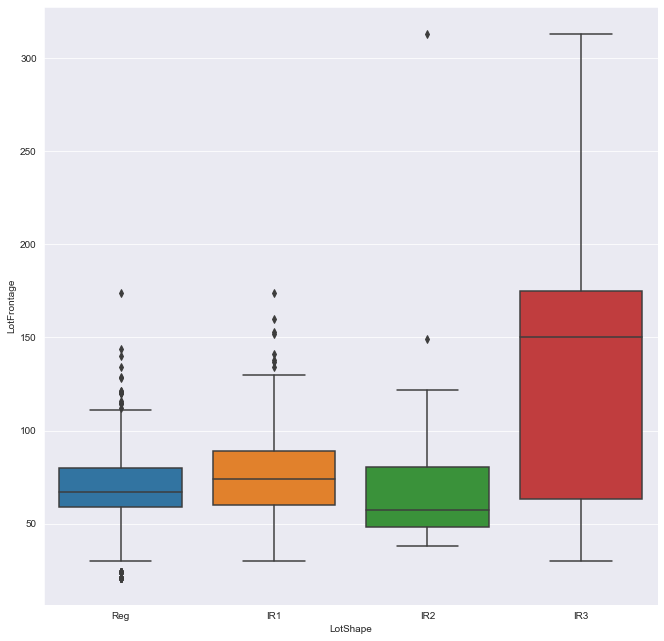

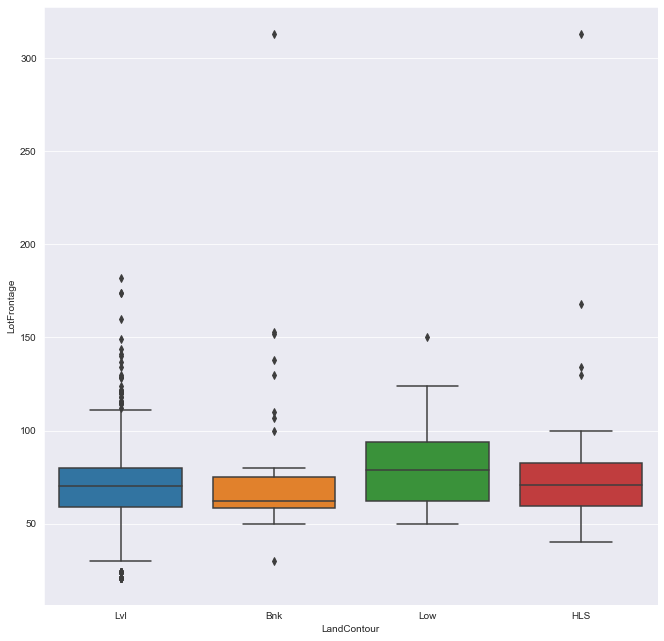

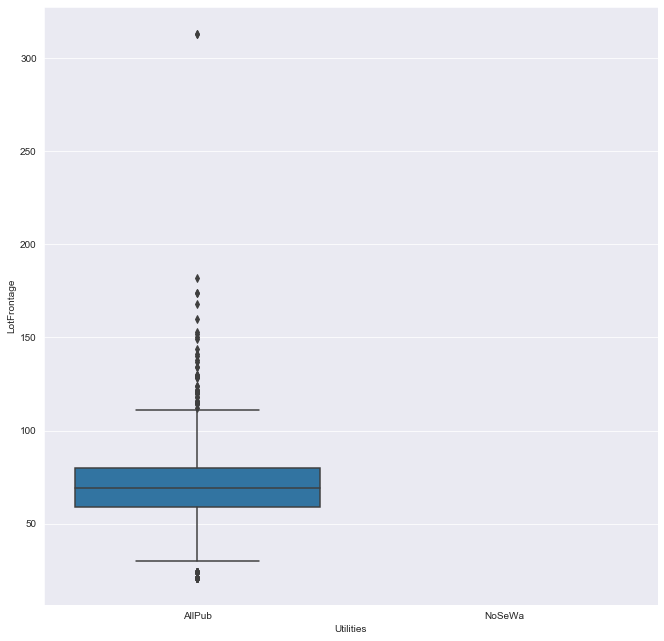

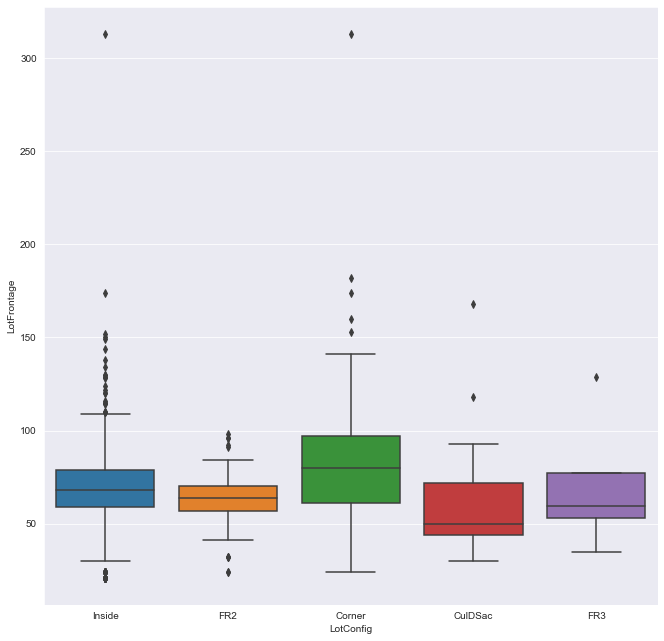

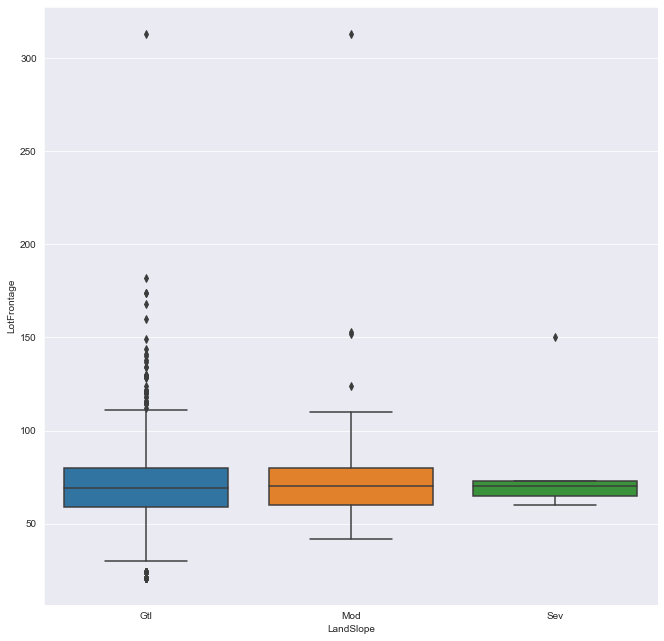

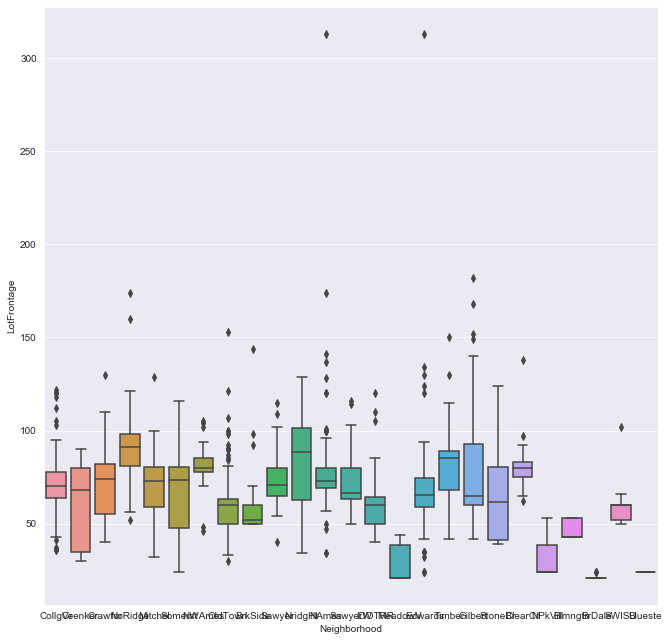

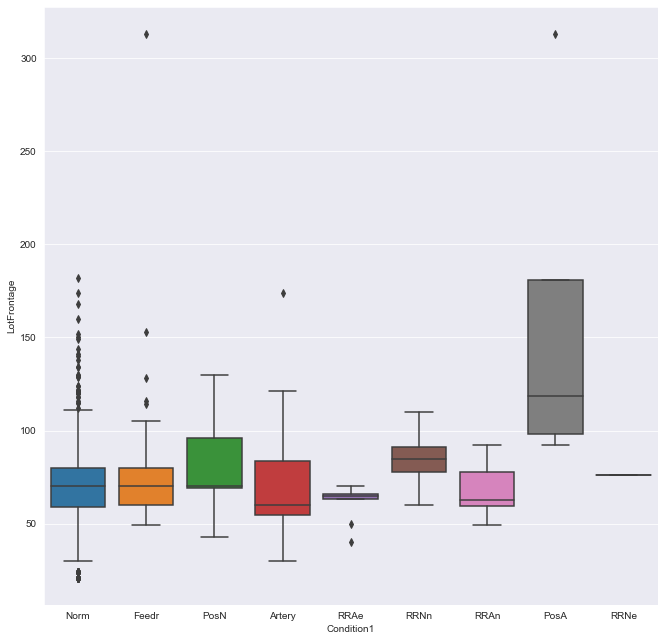

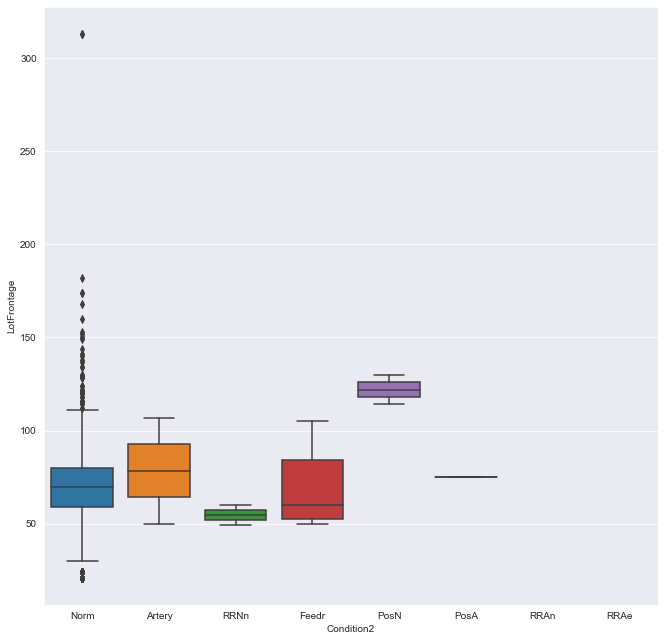

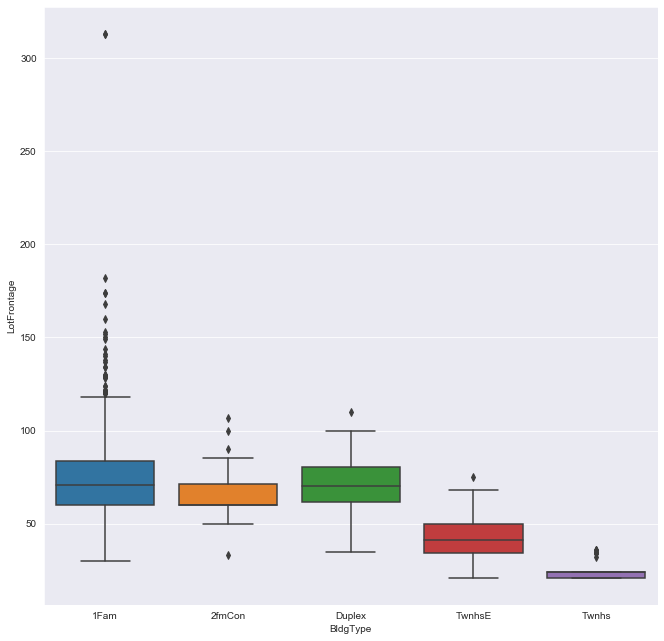

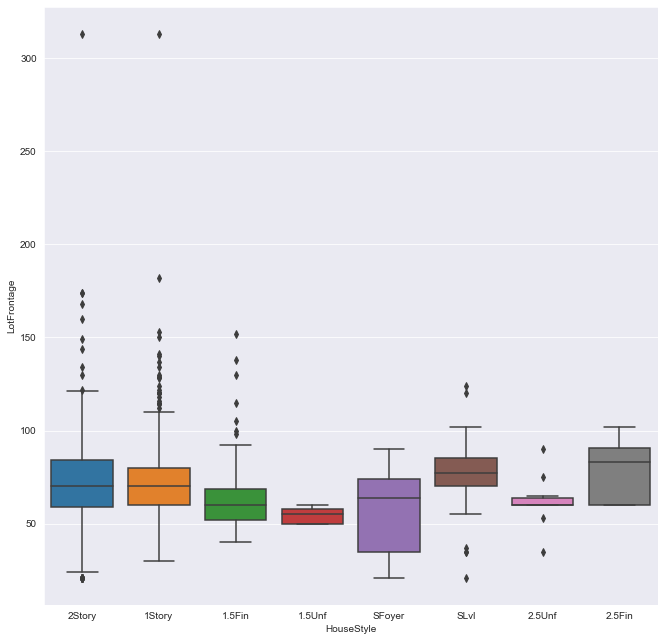

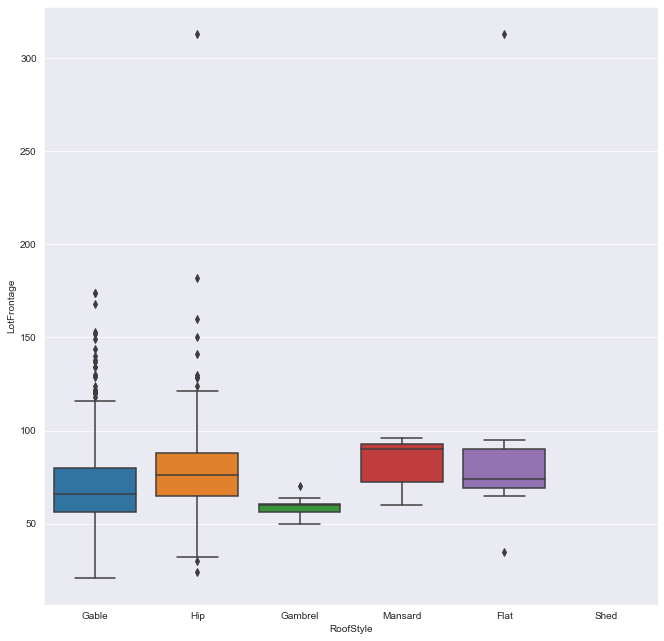

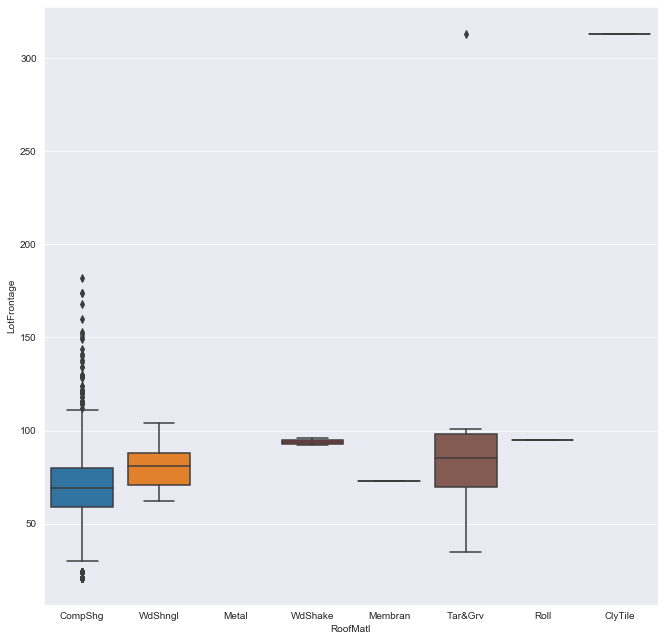

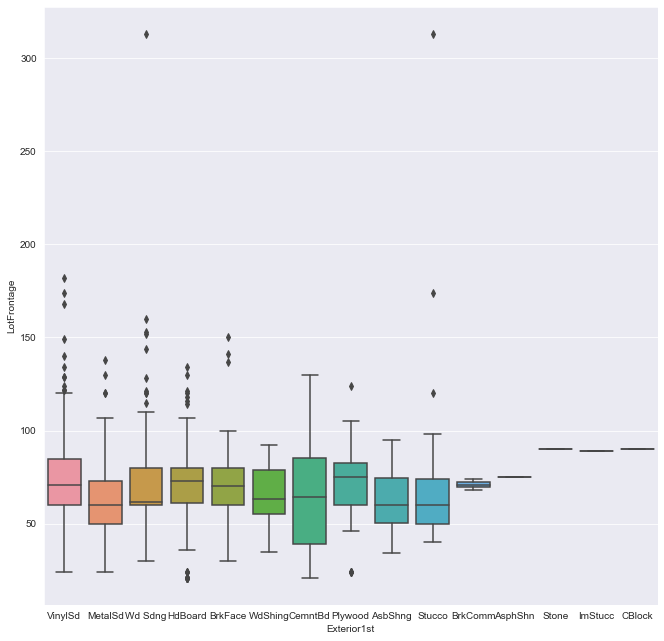

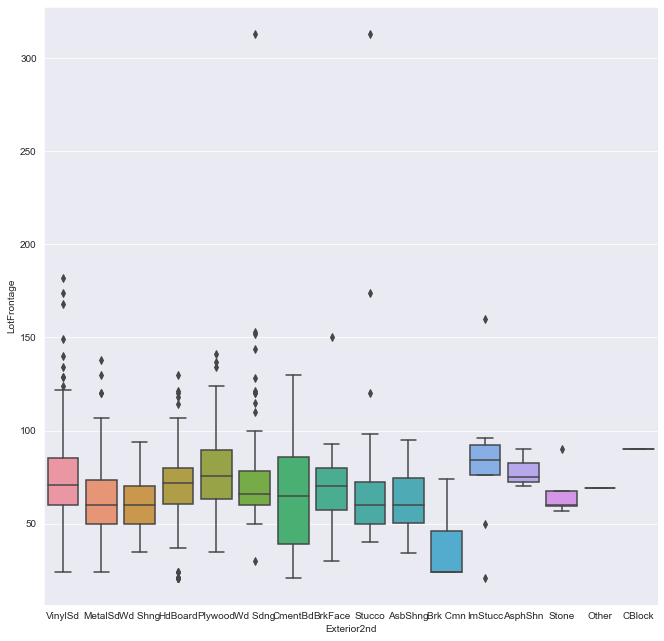

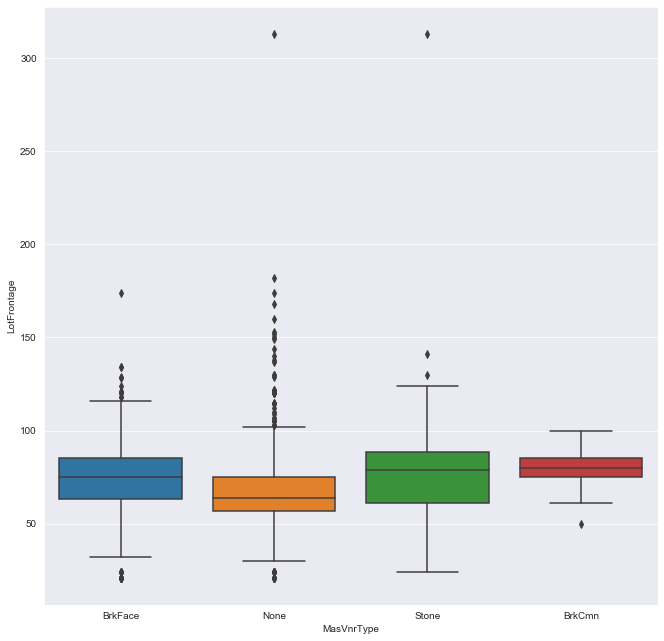

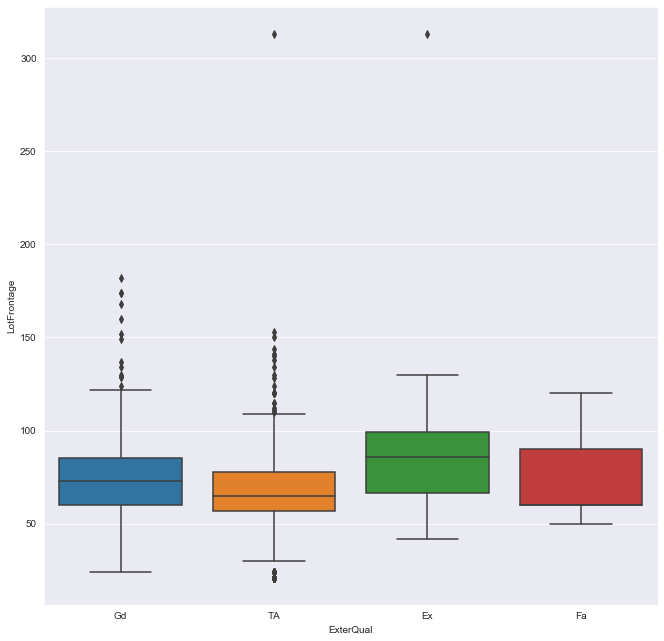

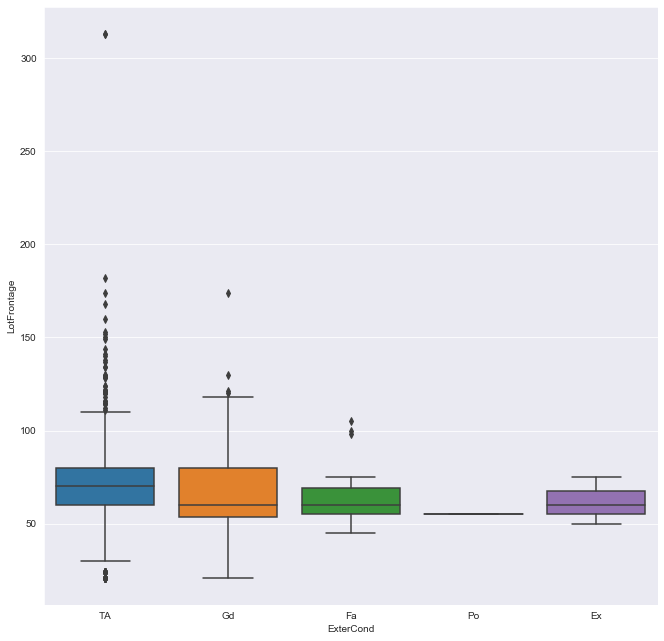

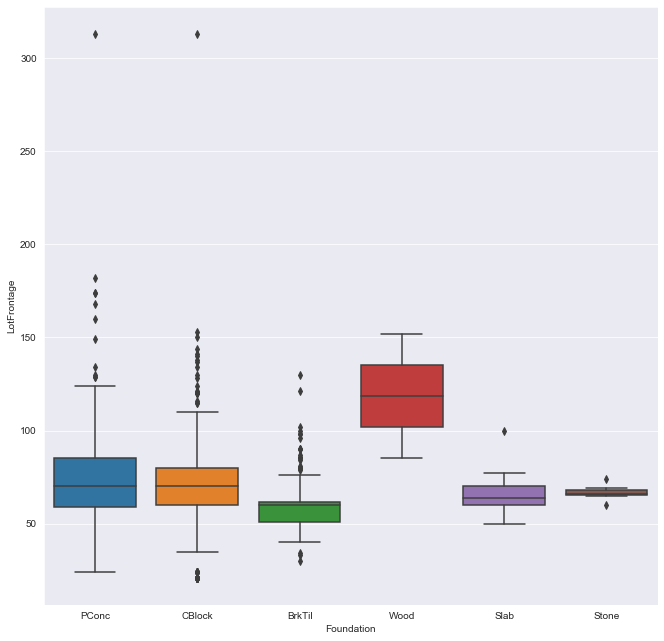

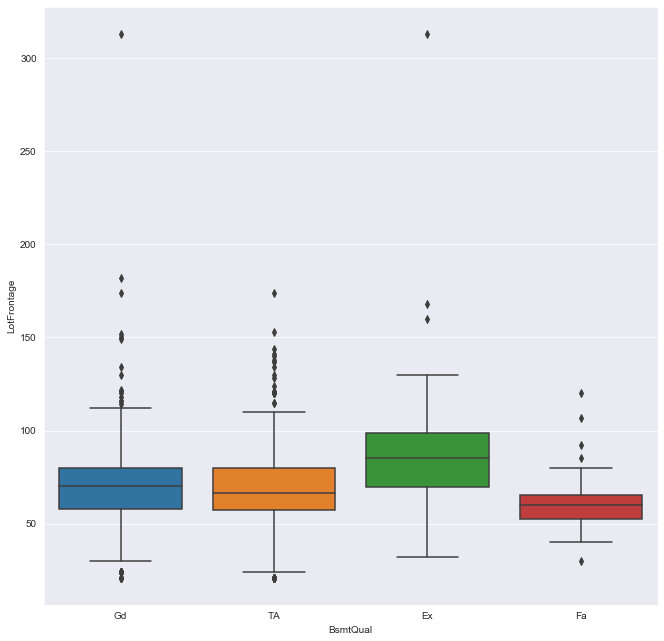

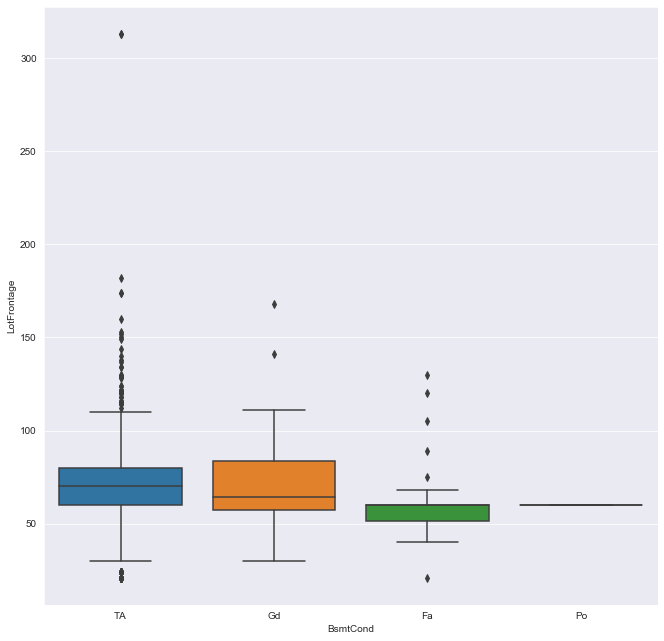

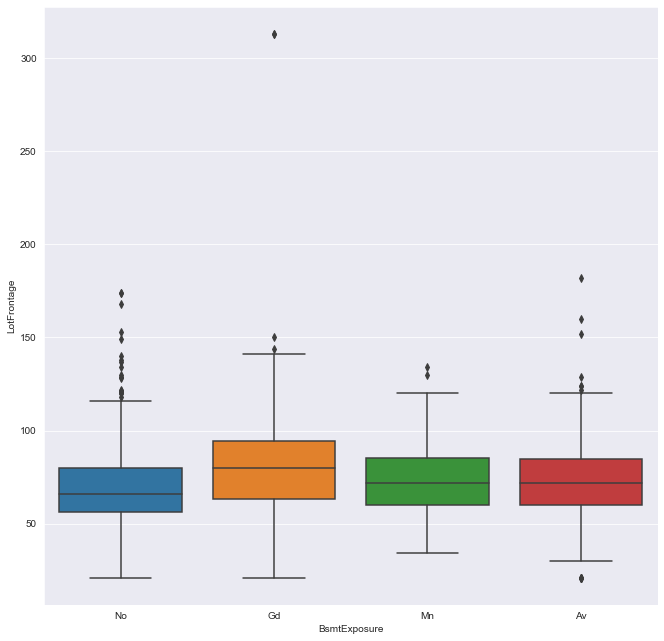

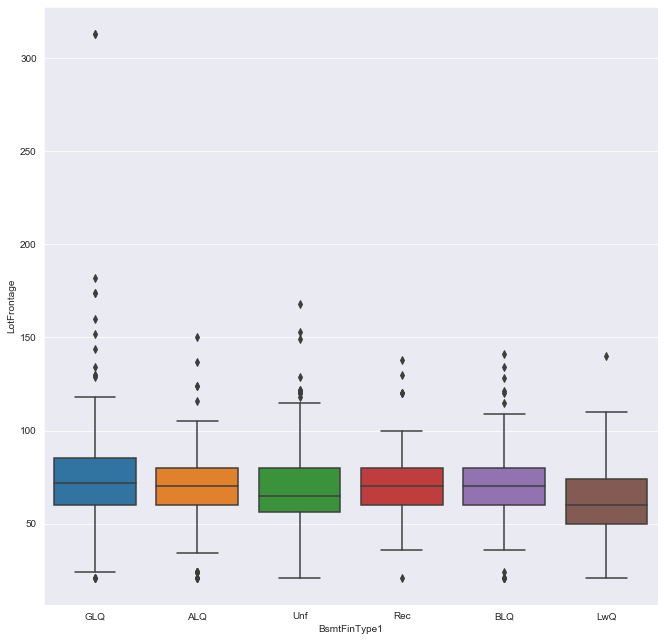

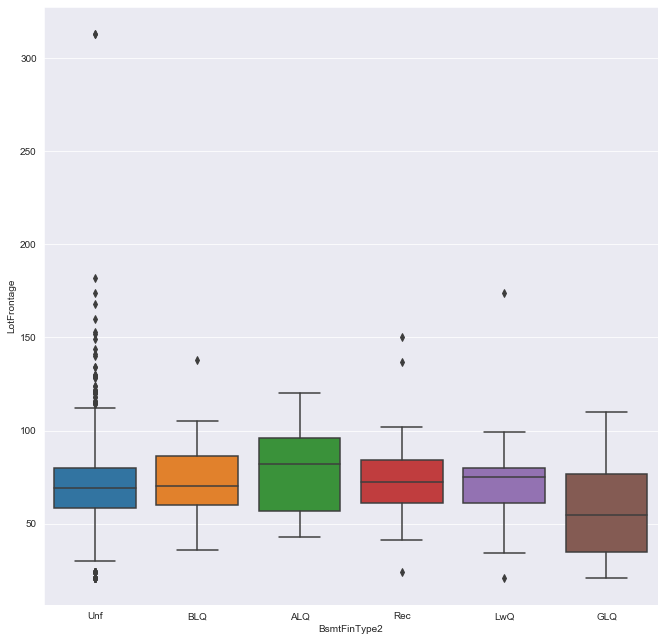

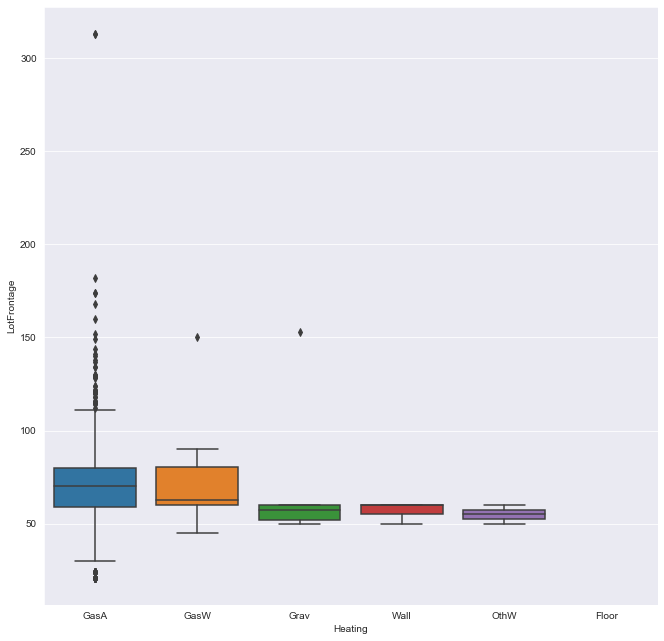

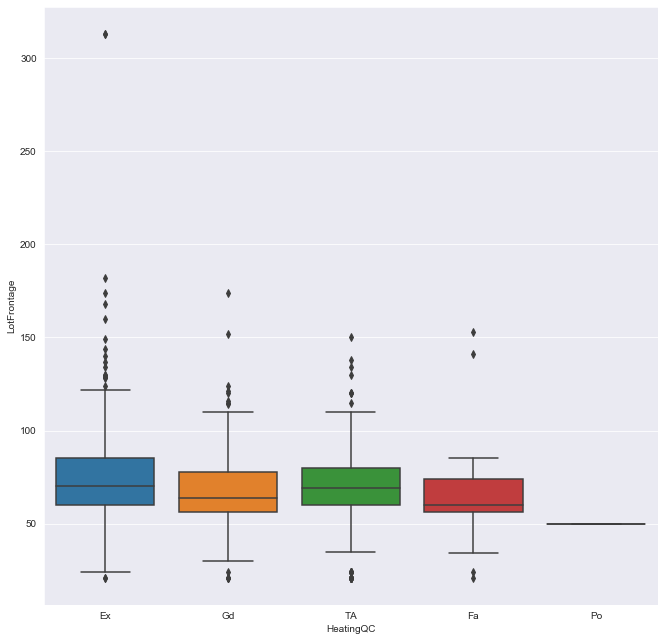

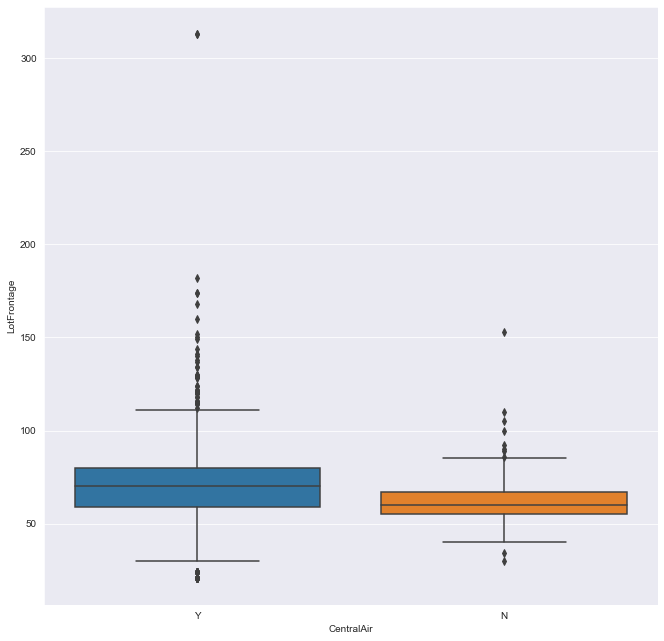

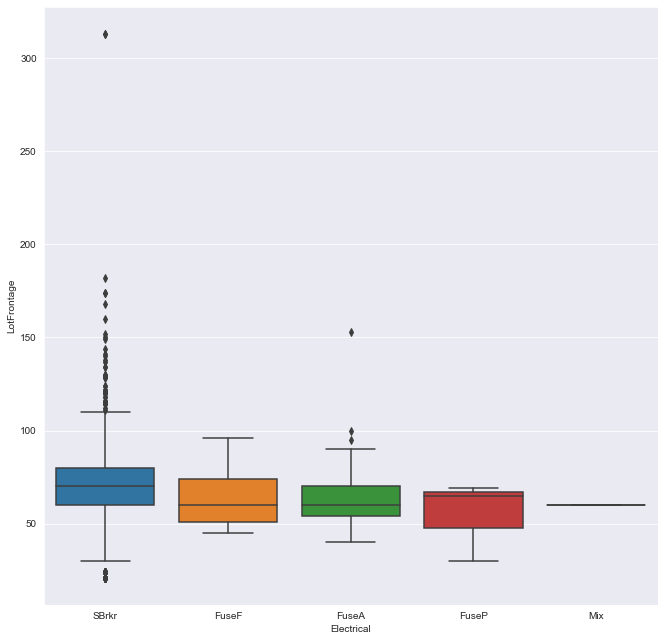

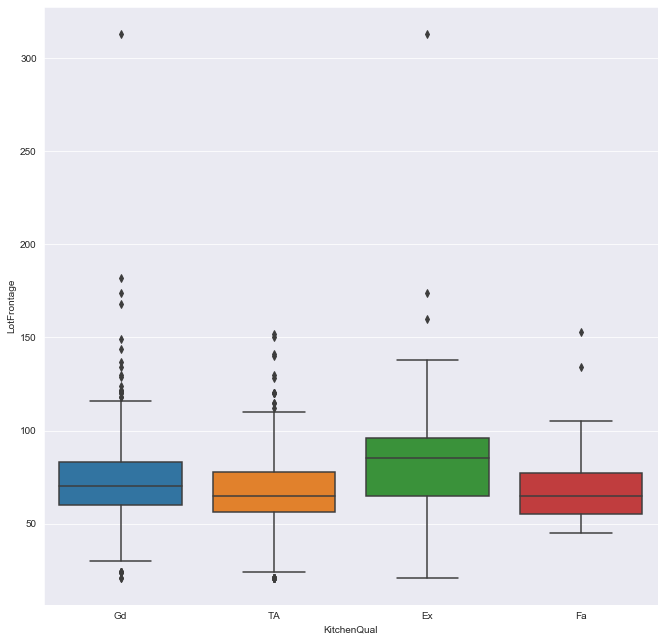

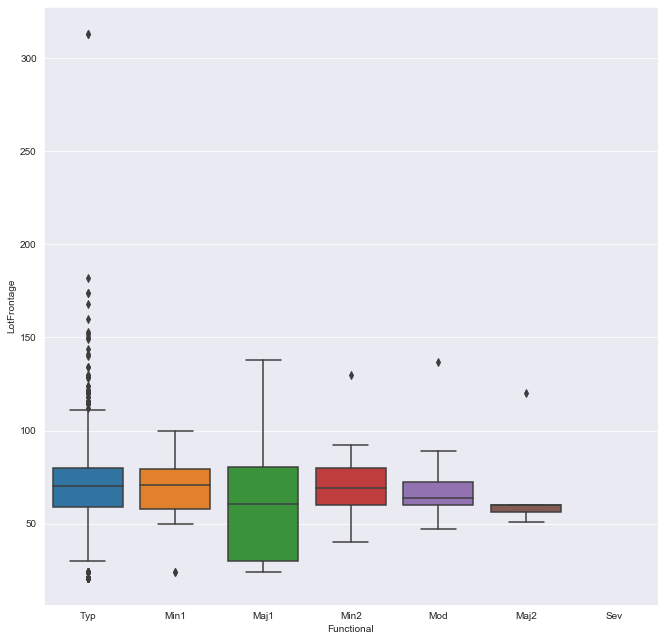

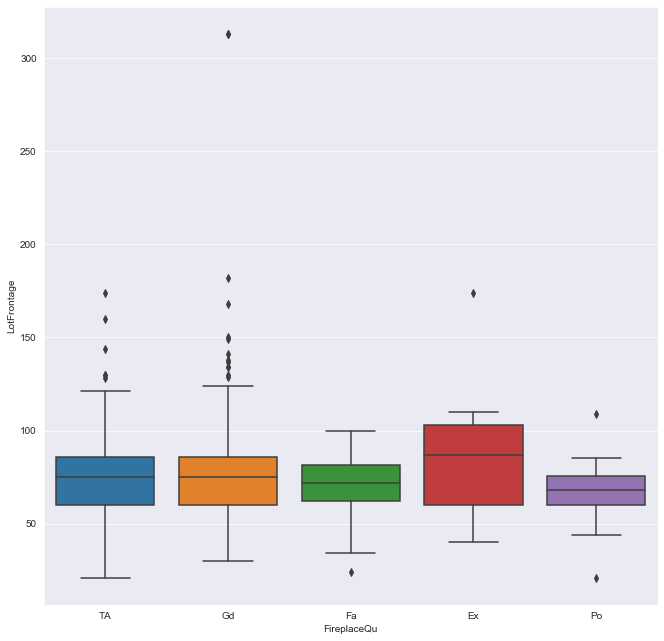

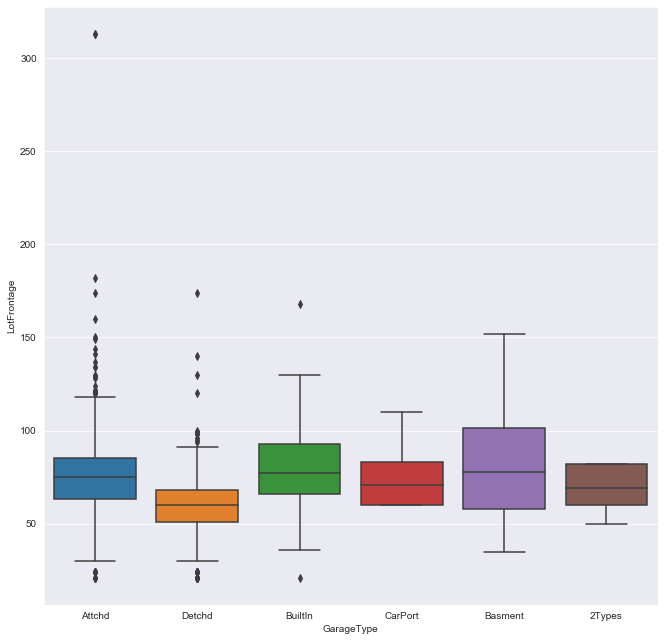

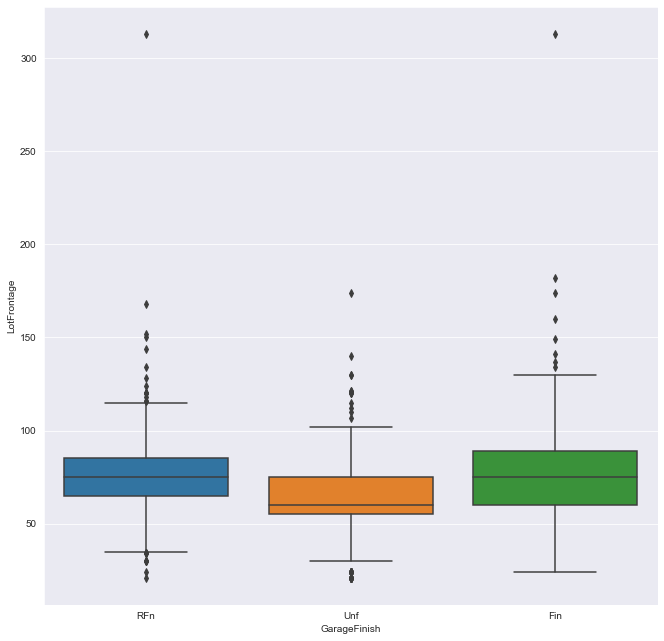

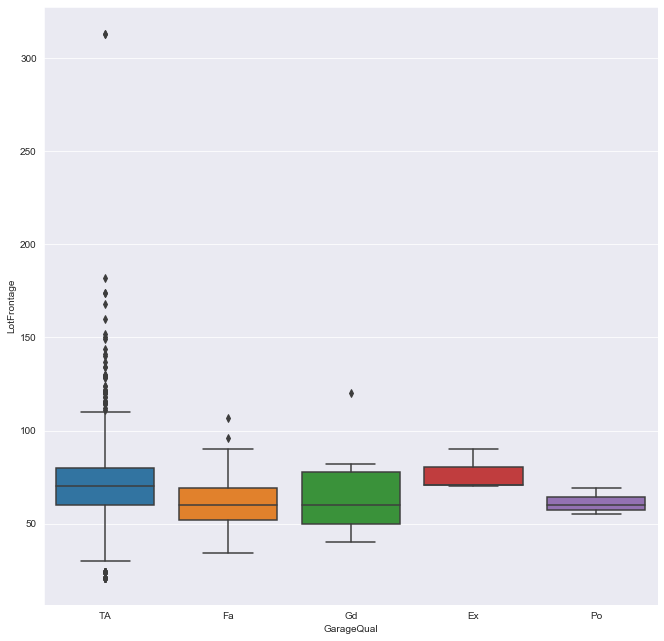

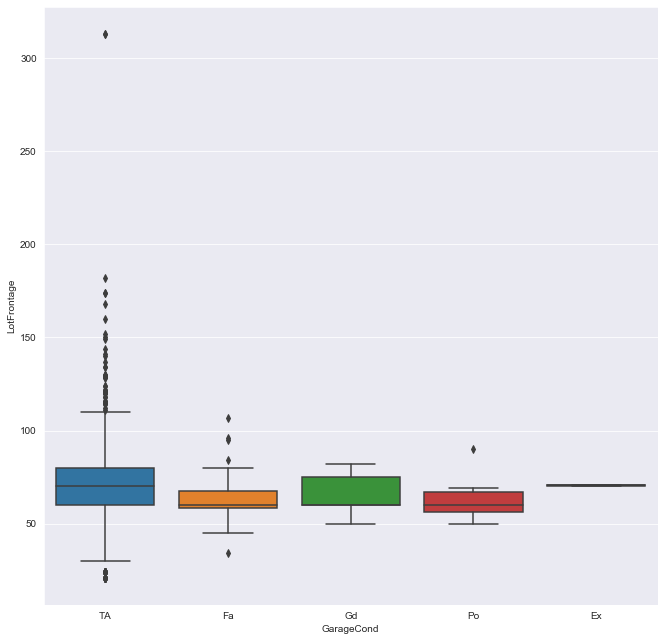

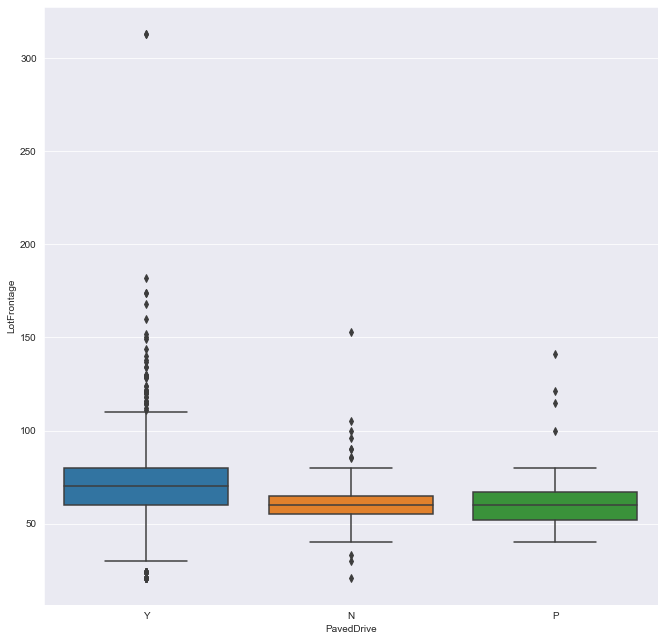

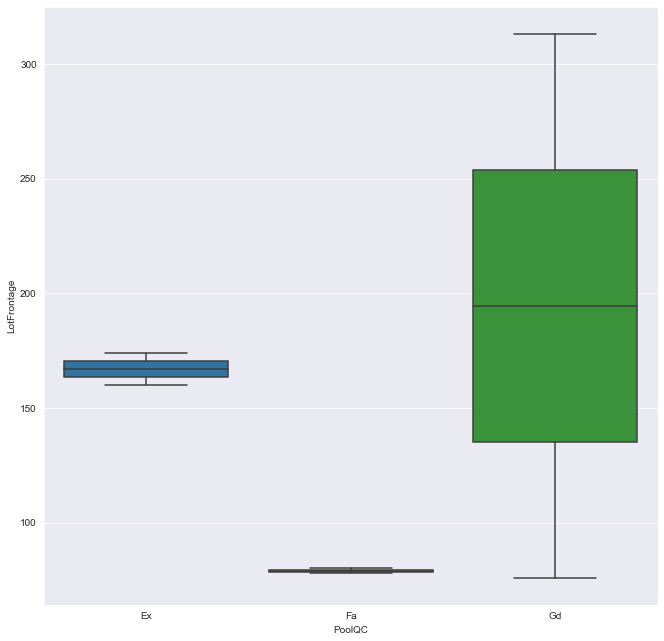

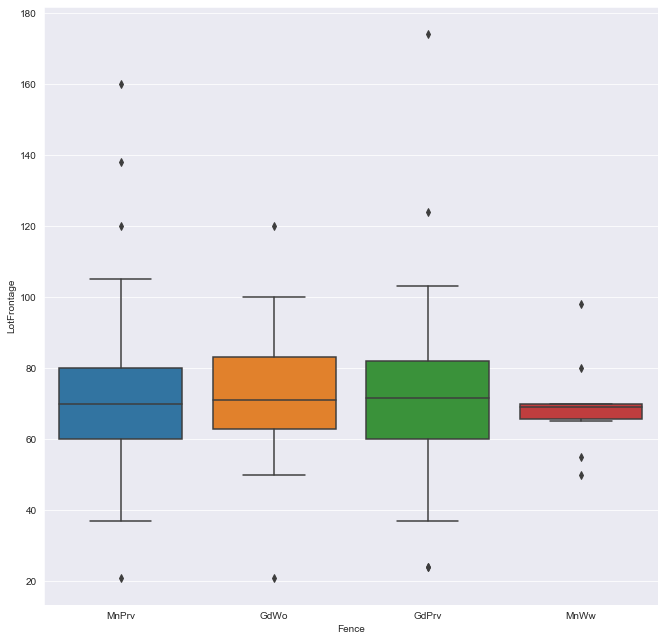

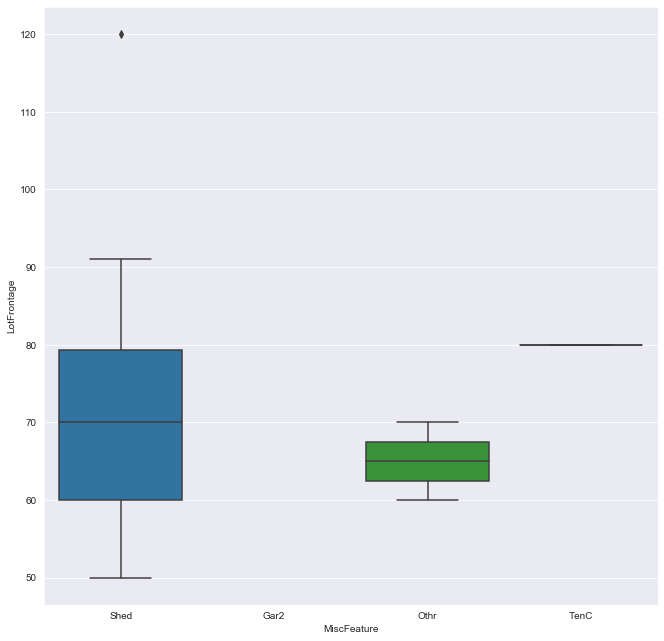

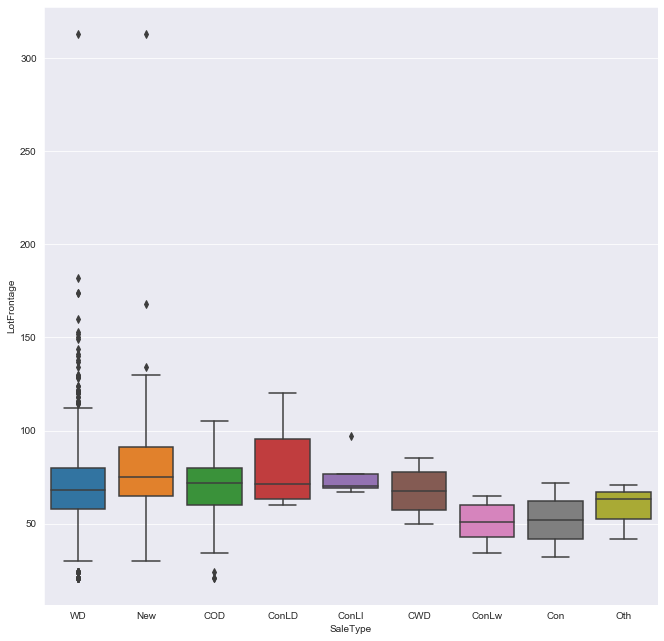

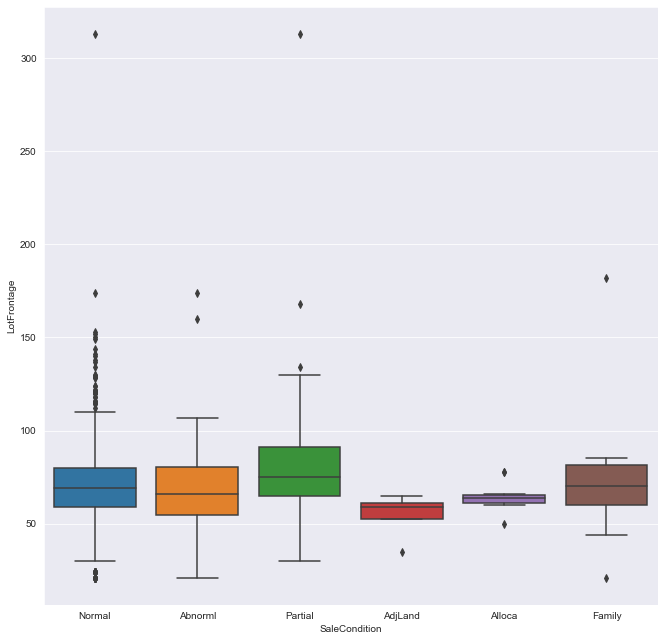

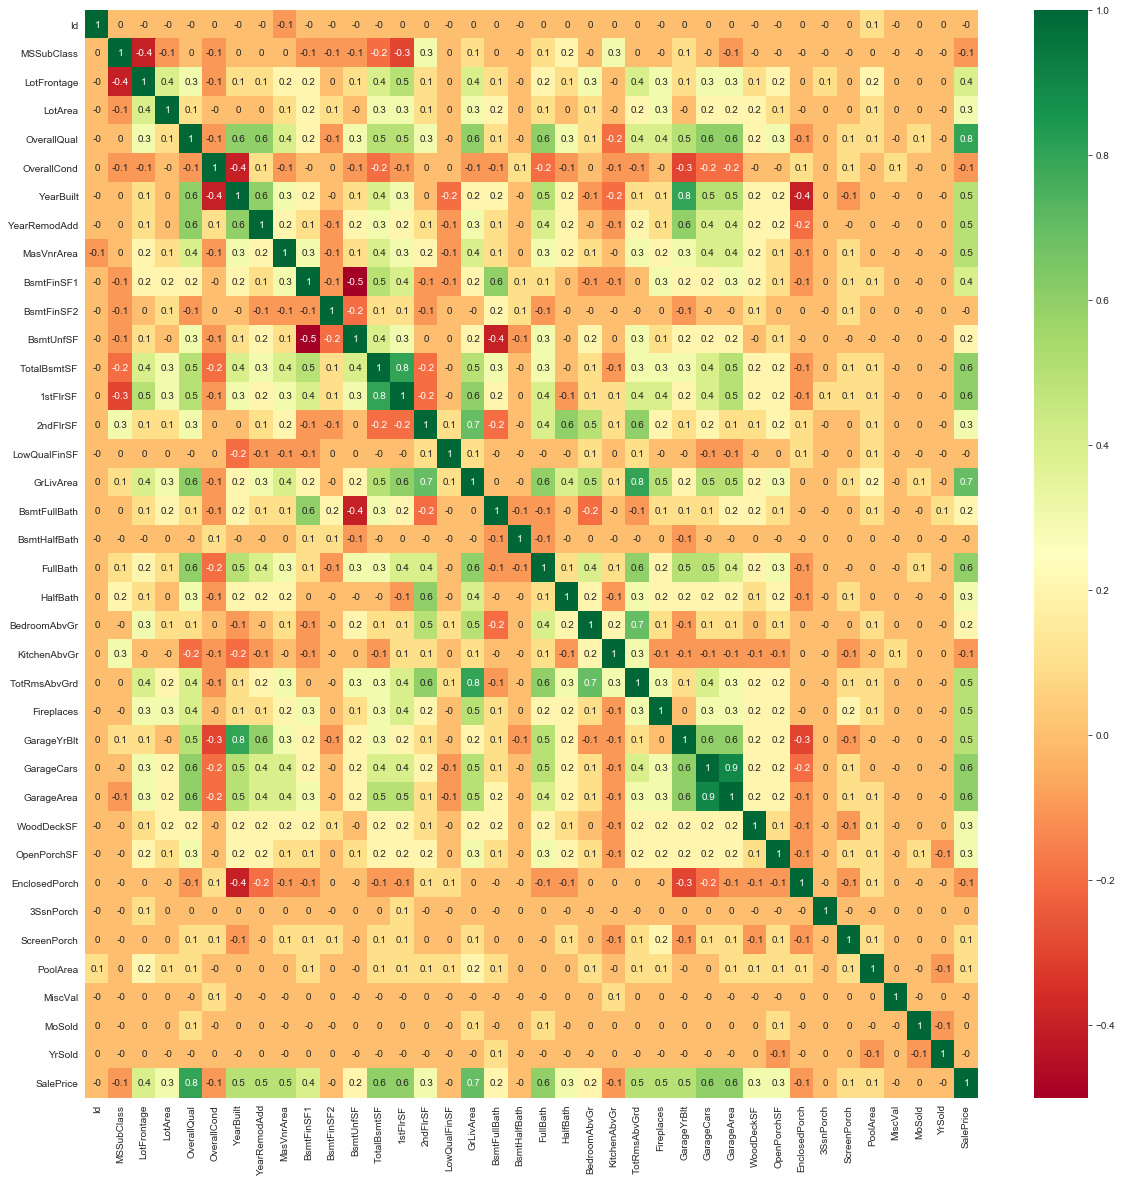

In [157]:
##missing value correction
#columns to check- PoolQC , Fence , MiscFeature, GarageCond, GarageQual, GarageFinish, GarageYrBlt , GarageType, Electrical 
#FireplaceQu , BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond , BsmtQual, MasVnrType, MasVnrArea,  Alley, LotFrontage

train['BsmtExposure'].value_counts().index[0]
train['GarageYrBlt'].median()
#train['LotFrontage']
import seaborn as sns
from matplotlib.pyplot import yticks, xticks, subplots, set_cmap
import matplotlib.pyplot as plt
for i in categorical_vars:
    plt.figure(figsize=(11,11))
    sns.boxplot(x=train[i],y=train['LotFrontage'])
    plt.show()
    plt.close()
#train[train['LotFrontage']
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
train['Electrical'].value_counts()
train_null_counts=train.apply(lambda x: x.isnull().sum(axis=0))

In [158]:
#missing value imputation for both train & test

df['PoolQC'].fillna('NA',inplace=True)
df['Fence'].fillna('None',inplace=True)
df['MiscFeature'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)
df['GarageType'].fillna('NA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['Electrical'].fillna(df['Electrical'].value_counts().index[0],inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtExposure']=np.where((df['BsmtExposure'].isnull()) & (df['BsmtFinType1']=='NA'),'NA',df['BsmtExposure'])
df['BsmtExposure'].fillna(df['BsmtExposure'].value_counts().index[0],inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0.0,inplace=True)
df['Alley'].fillna('NA',inplace=True) 
# df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='NA'),df[df['Alley']=='NA'].LotFrontage.mean(),df['LotFrontage'] )
# df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Grvl'),df[df['Alley']=='Grvl'].LotFrontage.mean(),df['LotFrontage'] )
# df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Pave'),df[df['Alley']=='Pave'].LotFrontage.mean(),df['LotFrontage'] )
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#MSZoning , Utilities, Exterior2nd, BsmtFinSF1,BsmtFinSF2,
# BsmtHalfBath, GarageArea
df['Exterior1st'].fillna(df['Exterior1st'].value_counts().index[0],inplace=True)
df['BsmtUnfSF'].fillna(0.0,inplace=True)
df['TotalBsmtSF'].fillna(0.0,inplace=True)
df['BsmtFullBath'].fillna(0.0,inplace=True)
df['KitchenQual'].fillna('TA',inplace=True)
df['Functional'].fillna('Typ',inplace=True)
df['GarageCars'].fillna(0.0,inplace=True)
df['MSZoning'].fillna(df['MSZoning'].value_counts().index[0],inplace=True)
df['Utilities'].fillna(df['Utilities'].value_counts().index[0],inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().index[0],inplace=True)
df['BsmtFinSF1'].fillna(0.0,inplace=True)
df['BsmtFinSF2'].fillna(0.0,inplace=True)
df['BsmtHalfBath'].fillna(0.0,inplace=True)
df['GarageArea'].fillna(0.0,inplace=True)

In [159]:
df['BsmtHalfBath'].value_counts(dropna=False)

0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [160]:

#Transforming some numerical variables that are really categorical
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)


In [161]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape df: {}'.format(df.shape))


Shape df: (2919, 82)


In [162]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


In [163]:
cat=df.select_dtypes(include=['object']).columns
cat=cat.drop(['type'])
#One Hot Encoding of the Categorical features 
ls=[]
list_df=[]
for i in cat:
    locals()['df_' + str(i)]=pd.get_dummies(df[i],prefix="_"+i)
    ls.append(locals()['df_' + str(i)])
df.drop(cat,axis=1,inplace=True)
list_df.append(df)
list_df.extend(ls)
df=pd.concat(list_df,axis=1)    



In [164]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
# skewness = df.apply(lambda x: skew(x))
# skewness = skewness[abs(skewness) > 0.5]
# print(str(skewness.shape[0]) + " skewed numerical features to log transform")
# skewed_features = skewness.index
# df[skewed_features] = np.log1p(df[skewed_features])

from scipy.special import boxcox1p
lam = 0.15

#log transformation of numeric features
for i in numerical_vars:
    if i!='Id' and i!='SalePrice':
        skewness=skew(df[i])
        #print('skewness of ',i,skewness)
        if abs(skewness)>0.5:
            #df[i]=np.log1p(df[i])
            df[i] = boxcox1p(df[i], lam)

In [165]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       '_SaleType_ConLw', '_SaleType_New', '_SaleType_Oth', '_SaleType_WD',
       '_SaleCondition_Abnorml', '_SaleCondition_AdjLand',
       '_SaleCondition_Alloca', '_SaleCondition_Family',
       '_SaleCondition_Normal', '_SaleCondition_Partial'],
      dtype='object', length=226)

In [166]:
#df.reset_index(inplace=True)
#df.drop(['level_0','index'],axis=1,inplace=True)
df.shape

(2919, 226)

In [167]:
train=df[df.type=='train']
test=df[df.type=='test']
target=train['SalePrice']
train.drop(['type','SalePrice'],axis=1,inplace=True)
test.drop(['type','SalePrice'],axis=1,inplace=True)


 mu = 180921.20 and sigma = 79415.29

Skewness: 1.882876
Kurtosis: 6.536282


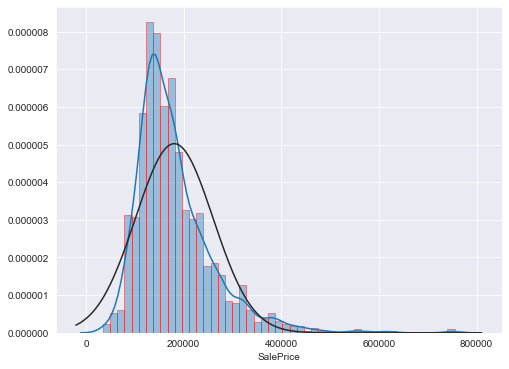

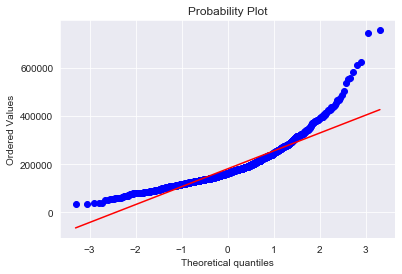

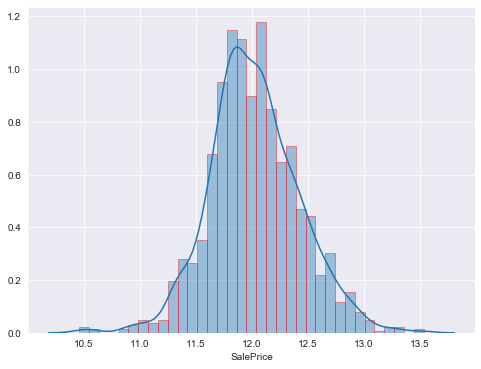

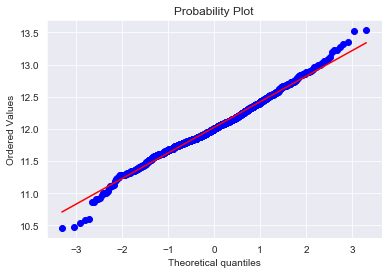

In [168]:
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)},fit=norm)  #right skewed

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target[target>0])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

target= np.log1p(target)
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)})  #right skewed

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

In [169]:
len(target)

1460

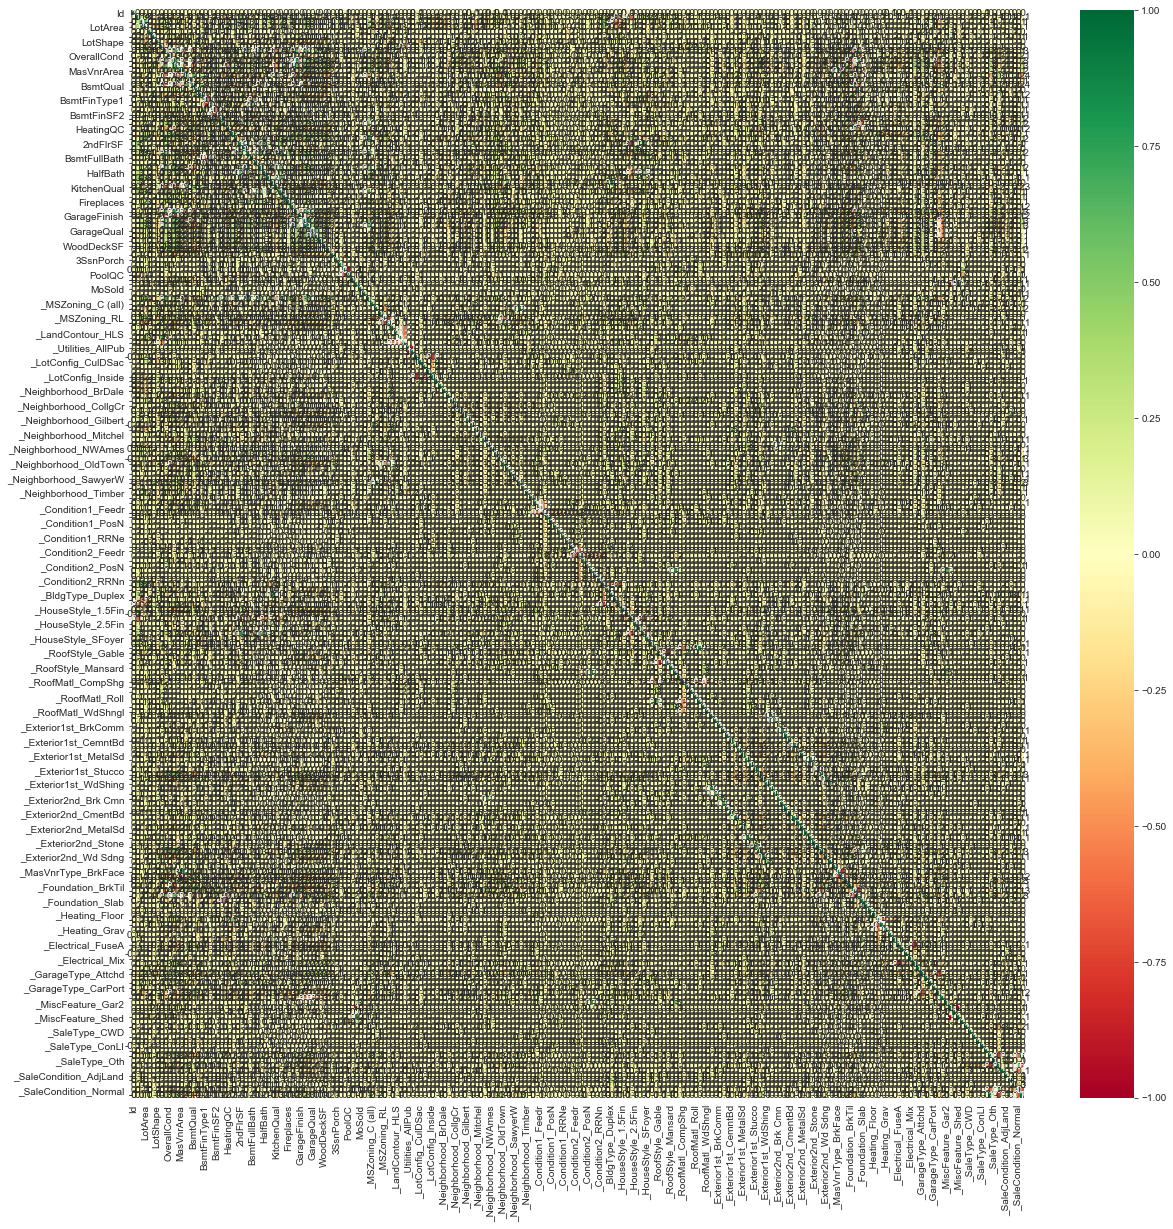

In [170]:
#check correlation
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [171]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       '_SaleType_ConLw', '_SaleType_New', '_SaleType_Oth', '_SaleType_WD',
       '_SaleCondition_Abnorml', '_SaleCondition_AdjLand',
       '_SaleCondition_Alloca', '_SaleCondition_Family',
       '_SaleCondition_Normal', '_SaleCondition_Partial'],
      dtype='object', length=224)

In [172]:

#drop correlated columns
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [173]:
len(selected_columns)

213

In [174]:
selected_columns = train.iloc[:,1:].columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                try:
                    if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                        x = np.delete(x, j, 1)
                        columns = np.delete(columns, j)
                except:
                    continue
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(train.iloc[:,1:].values, target.values, SL, selected_columns)

In [175]:
len(selected_columns)
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [176]:
len(selected_columns)

data = pd.DataFrame(data = data_modeled, columns = selected_columns)


In [177]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       '_SaleType_CWD', '_SaleType_Con', '_SaleType_ConLD', '_SaleType_ConLI',
       '_SaleType_ConLw', '_SaleType_New', '_SaleType_Oth', '_SaleType_WD',
       '_SaleCondition_AdjLand', '_SaleCondition_Normal'],
      dtype='object', length=128)

In [178]:
#Validation function
n_folds = 5
data = data.reset_index(drop=True)
data=data.dropna()
target=target.dropna()
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(data.values)
    rmse= np.sqrt(-cross_val_score(model, data.values, target.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [179]:
###BASE MODELS

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [180]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1215 (0.0152)



In [181]:
len(data)

1460

In [182]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1214 (0.0153)



In [183]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1286 (0.0173)



In [184]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1230 (0.0115)



In [185]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1217 (0.0091)



In [186]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [187]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  
    

In [188]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1174 (0.0148)



In [189]:
averaged_models.fit(data.values, target.values)

AveragingModels(models=(Pipeline(memory=None,
                                 steps=[('robustscaler',
                                         RobustScaler(copy=True,
                                                      quantile_range=(25.0,
                                                                      75.0),
                                                      with_centering=True,
                                                      with_scaling=True)),
                                        ('elasticnet',
                                         ElasticNet(alpha=0.0005, copy_X=True,
                                                    fit_intercept=True,
                                                    l1_ratio=0.9, max_iter=1000,
                                                    normalize=False,
                                                    positive=False,
                                                    precompute=False,
                                   

In [190]:
test.shape

(1459, 224)

In [191]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       '_SaleType_CWD', '_SaleType_Con', '_SaleType_ConLD', '_SaleType_ConLI',
       '_SaleType_ConLw', '_SaleType_New', '_SaleType_Oth', '_SaleType_WD',
       '_SaleCondition_AdjLand', '_SaleCondition_Normal'],
      dtype='object', length=128)

In [192]:
new=test[selected_columns]

In [193]:
#data.shape
new.shape

(1459, 128)

In [194]:
#test['Neighborhood'].replace({'NAmes':'Names'},inplace=True)
# test['Neighborhood'].value_counts()

# for i in set(categorical_vars).intersection(set(selected_columns)):
#     print(test[i].value_counts(dropna=False))


In [195]:

test['SalePrice']=averaged_models.predict(new.values)

In [196]:
test['SalePrice']=np.expm1(test['SalePrice'])

In [197]:
test[['Id', 'SalePrice']].to_csv('test_submission_averaged models.csv',index=False)

In [198]:
test['SalePrice']

0       118489.407213
1       158356.556478
2       186084.144826
3       193809.503513
4       199047.485438
            ...      
1454     85762.831163
1455     82046.326576
1456    165107.383254
1457    117139.726440
1458    222564.100950
Name: SalePrice, Length: 1459, dtype: float64

In [151]:
y_train

array([143250., 129900., 166000., ..., 176432., 128000., 271000.])

In [141]:
test.shape

(1459, 224)

In [123]:
train.shape

(1458, 212)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train = StandardScaler().fit_transform(X_train)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [ ]:
X_tr.shape

In [ ]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

In [ ]:
model.summary()

In [ ]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

In [ ]:
pd.Series(model.predict(X_val)[:,0]).hist()